In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn import model_selection

import time

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Function to show images
def show_images(df, y):
    n_rows, n_cols = 3, 7
    plt.figure(figsize=(15,9))
    for i in range(n_rows*n_cols):
        plt.subplot(n_rows, n_cols, i+1)
        plt.imshow(df[i])
        plt.title('Label: {}'.format(y[i]))
    plt.show()

Shapes of data before reshaping:  (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


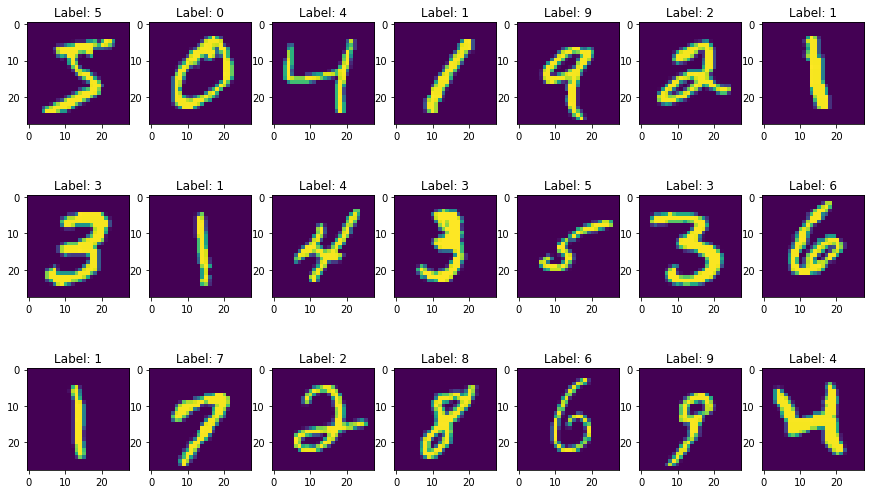

Shapes of data after reshaping:  (60000, 784) (60000, 10) (10000, 784) (10000, 10)


In [3]:
# Function to load dataset from keras
def load_dataset(show_some_images = False):
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
    print('Shapes of data before reshaping: ', X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    if show_some_images: show_images(X_train, y_train)
    # Reshaping dataset to have a single channel
    X_train = X_train.reshape(X_train.shape[0], 28*28).astype('float32')
    X_train = X_train/255.0
    X_test = X_test.reshape(X_test.shape[0], 28*28).astype('float32')
    X_test = X_test/255.0
    
    # One hot encoding for target values (each encoding for each target value)
    y_train = keras.utils.to_categorical(y_train)
    y_test = keras.utils.to_categorical(y_test)
    
    print('Shapes of data after reshaping: ', X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = load_dataset(True)

In [4]:
# Evaluate the model using KFold cross validation
def evaluate_model(X_data, y_data, n_epochs, batch_size, n_folds=5):
    scores, histories = list(), list()
    # Prepare cross validation
    kfold = model_selection.KFold(n_splits=n_folds, shuffle=True, random_state=SEED)
    # Enumerate splits
    i = 1
    for train_ix, test_ix in kfold.split(X_data):
        print('Round {} of {}'.format(i, n_folds))
        i += 1
        # define model
        model = build_model()
        # Select rows for train & test
        train_X, train_y, test_X, test_y = X_data[train_ix], y_data[train_ix], X_data[test_ix], y_data[test_ix]
        # Fit model
        history = model.fit(train_X, train_y, 
                            epochs=n_epochs, 
                            batch_size=batch_size,
                            validation_data=(test_X, test_y),
                            verbose=1)
        # Evaluate model
        # Returns the loss value & metrics values for the model in test mode.
        _, score = model.evaluate(test_X, test_y, verbose=1)
        
        scores.append(score)
        histories.append(history)
    return scores, histories

def summarize_result(histories):
    plt.figure(figsize=(20,6))
    for i in range(len(histories)):
        # Plot Accuracy
        plt.subplot(121)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
        plt.legend(['train', 'test'])
        
        # Plot loss
        plt.subplot(122)
        plt.title('Cross entropy loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        plt.legend(['train', 'test'])
    plt.show()
    
# Summarize model performances
def summarize_performance(score):
    print('Metric score: Mean = %.3f, std = %.3f'%(np.mean(score), np.std(score)))
    plt.boxplot(score)
    plt.show()

## NN architecture #1

In [5]:
# Build our model ---> (ANN)
def build_model():
    model = Sequential()
    model.add(Dense(units=128, 
                    activation='relu', 
                    kernel_initializer='he_uniform',
                    input_dim=784))
    # Again a dropout for convergence
    model.add(Dropout(0.25))
    # Output a softmax to squash the matrix into output probabilities
    model.add(Dense(units=10, activation='softmax'))
    
    # Compiling model
    model.compile(optimizer=keras.optimizers.Adam(lr=0.001), 
                  loss=keras.losses.categorical_crossentropy, 
                  metrics=['accuracy'])
    return model

build_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Shapes of data before reshaping:  (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Shapes of data after reshaping:  (60000, 784) (60000, 10) (10000, 784) (10000, 10)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None

Round 1 of 5
Epoch 1/15
375/375 [==============================] - 1s 2ms/step - loss: 0.4510 - accuracy: 0.8701 - val_loss: 0.2271 - val_accuracy: 0.9324
Epoch 2/15
375/375 [=============================

Epoch 5/15
375/375 [==============================] - 1s 2ms/step - loss: 0.1187 - accuracy: 0.9645 - val_loss: 0.1075 - val_accuracy: 0.9681
Epoch 6/15
375/375 [==============================] - 1s 2ms/step - loss: 0.1042 - accuracy: 0.9698 - val_loss: 0.0955 - val_accuracy: 0.9703
Epoch 7/15
375/375 [==============================] - 1s 2ms/step - loss: 0.0929 - accuracy: 0.9729 - val_loss: 0.0960 - val_accuracy: 0.9705
Epoch 8/15
375/375 [==============================] - 1s 2ms/step - loss: 0.0835 - accuracy: 0.9753 - val_loss: 0.0887 - val_accuracy: 0.9732
Epoch 9/15
375/375 [==============================] - 1s 2ms/step - loss: 0.0768 - accuracy: 0.9764 - val_loss: 0.0864 - val_accuracy: 0.9737
Epoch 10/15
375/375 [==============================] - 1s 2ms/step - loss: 0.0699 - accuracy: 0.9786 - val_loss: 0.0860 - val_accuracy: 0.9743
Epoch 11/15
375/375 [==============================] - 1s 2ms/step - loss: 0.0665 - accuracy: 0.9796 - val_loss: 0.0810 - val_accuracy: 0.9765
Epoc

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


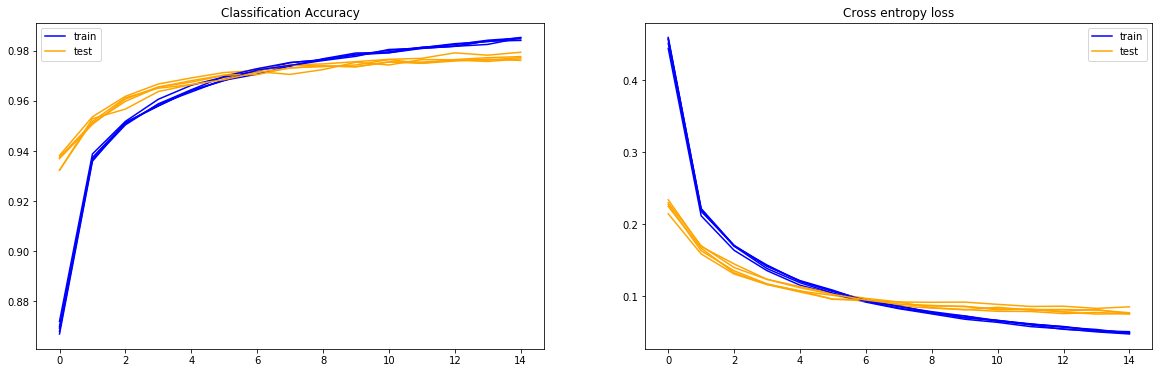

Metric score: Mean = 0.977, std = 0.001


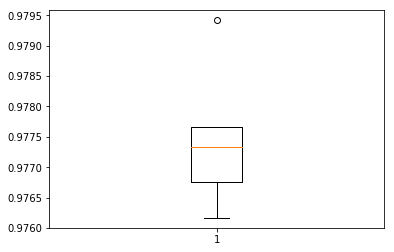

In [6]:
# Constants
SEED = 123
N_FOLDS = 5
N_EPOCHS = 15
BATCH_SIZE = 128

def run_test_harness():
    # Get the data
    X_train, y_train, X_test, y_test = load_dataset()
    print()
    
    # Print model summary
    print(build_model().summary())
    print()
    # Evaluate the model
    scores, histories = evaluate_model(X_train, y_train, n_epochs=N_EPOCHS, batch_size=BATCH_SIZE, n_folds=N_FOLDS)
    
    # Summarize the results
    summarize_result(histories)
    
    # Summarize performce
    summarize_performance(scores)
    
    return scores, histories

scores, histories = run_test_harness()

## NN architecture #2

In [7]:
# Build our model ---> (ANN)
def build_model():
    model = Sequential()
    model.add(Dense(units=128, 
                    activation='relu', 
                    kernel_initializer='he_uniform',
                    input_dim=784))
    # Again a dropout for convergence
#     model.add(Dropout(0.25))
    # Output a softmax to squash the matrix into output probabilities
    model.add(Dense(units=10, activation='softmax'))
    
    # Compiling model
    model.compile(optimizer=keras.optimizers.Adam(lr=0.001), 
                  loss=keras.losses.categorical_crossentropy, 
                  metrics=['accuracy'])
    return model

print(build_model().summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


Shapes of data before reshaping:  (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Shapes of data after reshaping:  (60000, 784) (60000, 10) (10000, 784) (10000, 10)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None

Round 1 of 5
Epoch 1/15
375/375 [==============================] - 1s 2ms/step - loss: 0.3959 - accuracy: 0.8912 - val_loss: 0.2203 - val_accuracy: 0.9347
Epoch 2/15
375/375 [==============================] - 1s 2ms/step - loss: 0.1787 - accuracy: 0.9492 - val_loss: 0.1612 - val_accuracy: 0.9534
Epoch 3/15
375/375 [===================

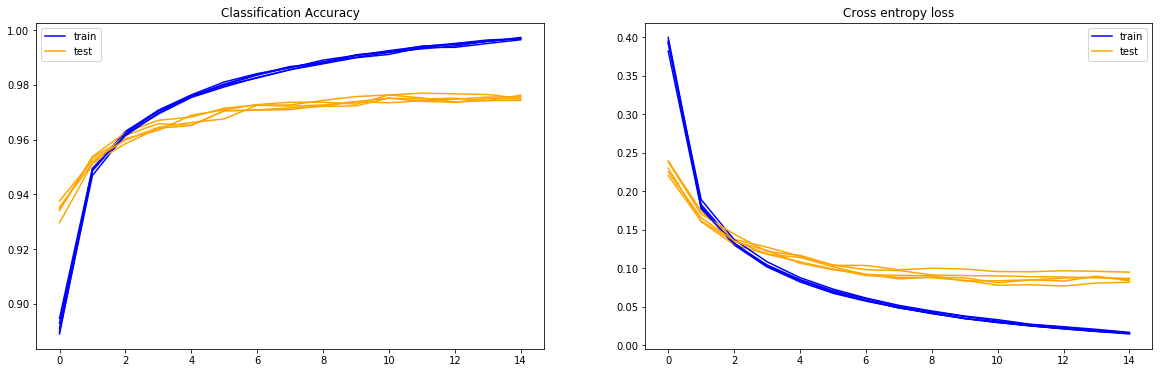

Metric score: Mean = 0.975, std = 0.001


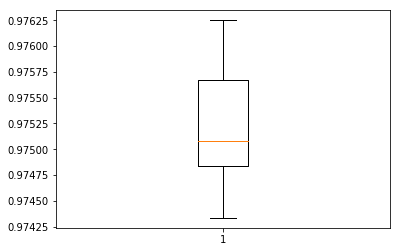

In [8]:
# Constants
SEED = 123
N_FOLDS = 5
N_EPOCHS = 15
BATCH_SIZE = 128

def run_test_harness():
    # Get the data
    X_train, y_train, X_test, y_test = load_dataset()
    print()
    
    # Print model summary
    print(build_model().summary())
    print()
    # Evaluate the model
    scores, histories = evaluate_model(X_train, y_train, n_epochs=N_EPOCHS, batch_size=BATCH_SIZE, n_folds=N_FOLDS)
    
    # Summarize the results
    summarize_result(histories)
    
    # Summarize performce
    summarize_performance(scores)
    
    return scores, histories

scores, histories = run_test_harness()

## NN architecture #3

In [9]:
# Build our model ---> (ANN)
def build_model():
    model = Sequential()
    model.add(Dense(units=128, 
                    activation='relu', 
                    kernel_initializer='he_uniform',
                    input_dim=784))
    # Again a dropout for convergence
    model.add(Dropout(0.25))
    # Adding another hidden layer
    model.add(Dense(units=128, activation='relu'))
    
    # Output a softmax to squash the matrix into output probabilities
    model.add(Dense(units=10, activation='softmax'))
    
    # Compiling model
    model.compile(optimizer=keras.optimizers.Adam(lr=0.001), 
                  loss=keras.losses.categorical_crossentropy, 
                  metrics=['accuracy'])
    return model

print(build_model().summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


Shapes of data before reshaping:  (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Shapes of data after reshaping:  (60000, 784) (60000, 10) (10000, 784) (10000, 10)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_33 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None

Round 1 of 5
Epoch 1/15
375/375 [==============================] - 1s 2

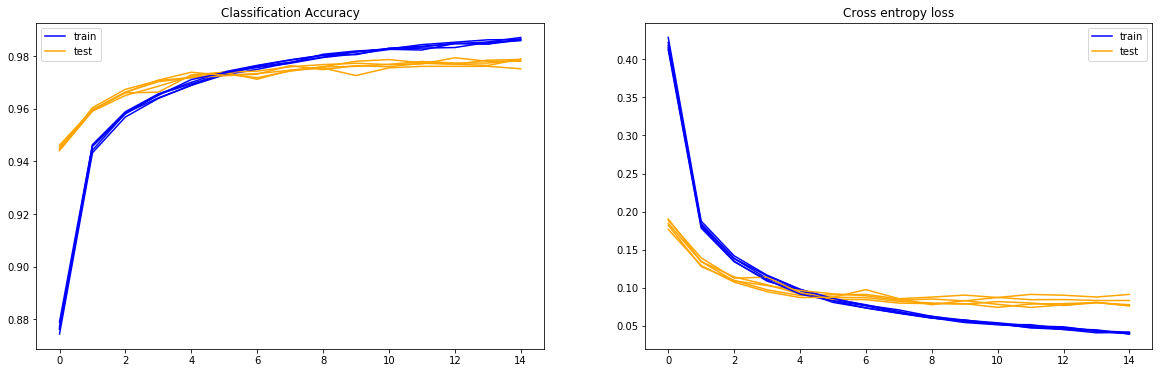

Metric score: Mean = 0.978, std = 0.001


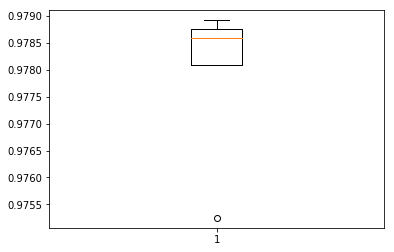

In [10]:
# Constants
SEED = 123
N_FOLDS = 5
N_EPOCHS = 15
BATCH_SIZE = 128

def run_test_harness():
    # Get the data
    X_train, y_train, X_test, y_test = load_dataset()
    print()
    
    # Print model summary
    print(build_model().summary())
    print()
    # Evaluate the model
    scores, histories = evaluate_model(X_train, y_train, n_epochs=N_EPOCHS, batch_size=BATCH_SIZE, n_folds=N_FOLDS)
    
    # Summarize the results
    summarize_result(histories)
    
    # Summarize performce
    summarize_performance(scores)
    
    return scores, histories

scores, histories = run_test_harness()

## NN architecture #4

In [11]:
# Build our model ---> (ANN)
def build_model():
    model = Sequential()
    model.add(Dense(units=128, 
                    activation='relu', 
                    kernel_initializer='he_uniform',
                    input_dim=784))
    # Again a dropout for convergence
    model.add(Dropout(0.25))
    # Adding another hidden layer
    model.add(Dense(units=512, activation='relu'))
    model.add(Dense(units=512, activation='relu'))
    model.add(Dense(units=512, activation='relu'))
    # Output a softmax to squash the matrix into output probabilities
    model.add(Dense(units=10, activation='softmax'))
    
    # Compiling model
    model.compile(optimizer=keras.optimizers.Adam(lr=0.001), 
                  loss=keras.losses.categorical_crossentropy, 
                  metrics=['accuracy'])
    return model


print(build_model().summary())

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_51 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_52 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_53 (Dense)             (None, 10)                5130      
Total params: 696,970
Trainable params: 696,970
Non-trainable params: 0
_______________________________________________

Shapes of data before reshaping:  (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Shapes of data after reshaping:  (60000, 784) (60000, 10) (10000, 784) (10000, 10)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_56 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_57 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_58 (Dense) 

Epoch 2/15
375/375 [==============================] - 3s 9ms/step - loss: 0.1635 - accuracy: 0.9490 - val_loss: 0.1347 - val_accuracy: 0.9592
Epoch 3/15
375/375 [==============================] - 3s 9ms/step - loss: 0.1323 - accuracy: 0.9600 - val_loss: 0.1016 - val_accuracy: 0.9692
Epoch 4/15
375/375 [==============================] - 3s 9ms/step - loss: 0.1112 - accuracy: 0.9650 - val_loss: 0.1039 - val_accuracy: 0.9704
Epoch 5/15
375/375 [==============================] - 3s 9ms/step - loss: 0.0949 - accuracy: 0.9707 - val_loss: 0.0879 - val_accuracy: 0.9738
Epoch 6/15
375/375 [==============================] - 3s 9ms/step - loss: 0.0825 - accuracy: 0.9737 - val_loss: 0.0897 - val_accuracy: 0.9731
Epoch 7/15
375/375 [==============================] - 3s 9ms/step - loss: 0.0805 - accuracy: 0.9746 - val_loss: 0.0879 - val_accuracy: 0.9741
Epoch 8/15
375/375 [==============================] - 3s 9ms/step - loss: 0.0746 - accuracy: 0.9762 - val_loss: 0.0782 - val_accuracy: 0.9768
Epoch 

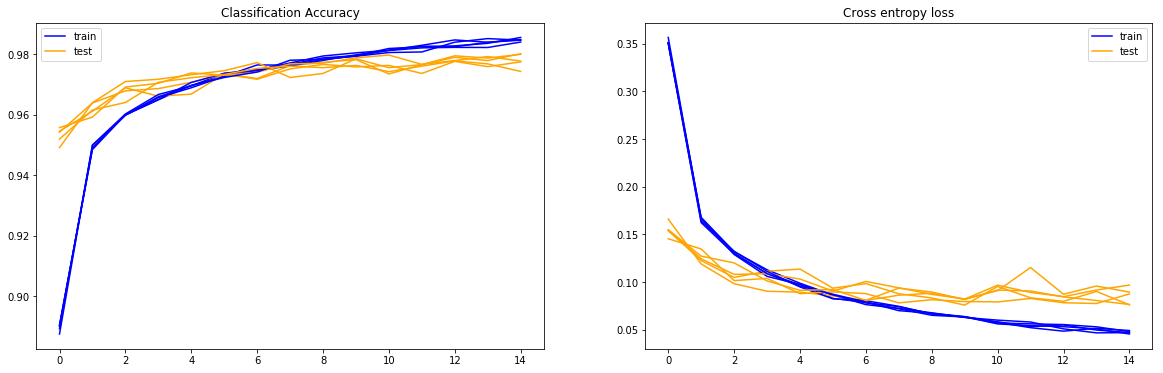

Metric score: Mean = 0.978, std = 0.002


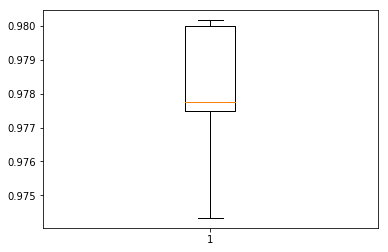

In [12]:
# Constants
SEED = 123
N_FOLDS = 5
N_EPOCHS = 15
BATCH_SIZE = 128

def run_test_harness():
    # Get the data
    X_train, y_train, X_test, y_test = load_dataset()
    print()
    
    # Print model summary
    print(build_model().summary())
    print()
    # Evaluate the model
    scores, histories = evaluate_model(X_train, y_train, n_epochs=N_EPOCHS, batch_size=BATCH_SIZE, n_folds=N_FOLDS)
    
    # Summarize the results
    summarize_result(histories)
    
    # Summarize performce
    summarize_performance(scores)
    
    return scores, histories

scores, histories = run_test_harness()